In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('bank_data.csv')


In [41]:
# Define the threshold levels
thresholds = [1000, 2000]  # Add more threshold levels if needed

# Create a new column to represent the recovery strategy level
data['recovery_level'] = pd.cut(data['expected_recovery_amount'], bins=thresholds, labels=False)

In [42]:
# Calculate the total recovery amount and total costs for each recovery strategy level
grouped_data = data.groupby('recovery_level').agg({'actual_recovery_amount': 'sum', 'recovery_level': 'count'})
grouped_data.columns = ['total_recovery_amount', 'total_customers']
grouped_data['total_costs'] = grouped_data['total_customers'] * 50

In [43]:
# Perform regression discontinuity analysis
X = sm.add_constant(grouped_data['total_costs'])
y = grouped_data['total_recovery_amount']

model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

ValueError: resids must contain at least 2 elements

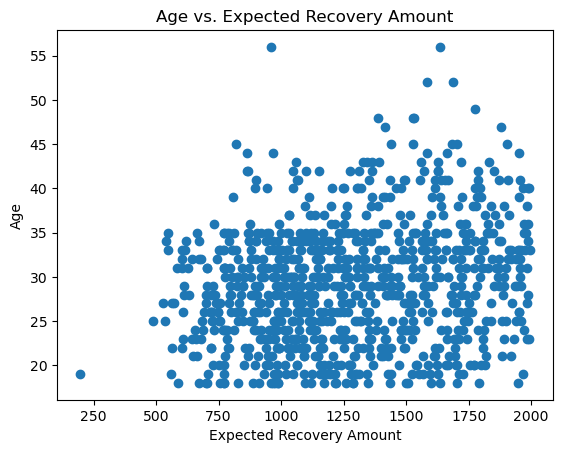

In [44]:
# Filter the data within the specified range of expected recovery amounts
filtered_data = data[(data['expected_recovery_amount'] > 0) & (data['expected_recovery_amount'] <= 2000)]

# Create a scatter plot of age vs. expected recovery amount
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount')
plt.show()

In [45]:
# Replace missing values in the 'age' column with the mean age
mean_age = data['age'].mean()
data['age'].fillna(mean_age, inplace=True)

# Define the threshold levels
thresholds = [900, 1100]

# Create a new column to represent the recovery strategy level
data['recovery_level'] = pd.cut(data['expected_recovery_amount'], bins=thresholds, labels=False)

# Filter the data for values just above and below the threshold
above_threshold_data = data[data['recovery_level'] == 1]
below_threshold_data = data[data['recovery_level'] == 0]

# Perform a statistical test to compare the average age between the two groups
above_threshold_mean_age = above_threshold_data['age'].mean()
below_threshold_mean_age = below_threshold_data['age'].mean()

In [46]:
# Print the results
print("Mean age just above the threshold: ", above_threshold_mean_age)
print("Mean age just below the threshold: ", below_threshold_mean_age)

Mean age just above the threshold:  nan
Mean age just below the threshold:  27.933701657458563


In [47]:
above_threshold_data['age'].isnull().sum()

0

In [48]:
pd.to_numeric(above_threshold_data['age'], errors='coerce').isnull().sum()

0

In [49]:
# Define the threshold range for expected recovery amount
threshold_range = (900, 1100)

# Filter the data within the threshold range
filtered_data = data[(data['expected_recovery_amount'] >= threshold_range[0]) & (data['expected_recovery_amount'] <= threshold_range[1])]

# Calculate the percentage of male customers above and below the threshold
above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]
below_threshold = filtered_data[filtered_data['expected_recovery_amount'] <= 1000]

percentage_male_above = len(above_threshold[above_threshold['sex'] == 'Male']) / len(above_threshold) * 100
percentage_male_below = len(below_threshold[below_threshold['sex'] == 'Male']) / len(below_threshold) * 100

# Perform a statistical test (e.g., chi-square test) to compare the percentages
observed = [[percentage_male_above, 100 - percentage_male_above],
            [percentage_male_below, 100 - percentage_male_below]]
chi2, p_value, _, _ = stats.chi2_contingency(observed)

# Print the results
print(f"Percentage of male customers above threshold: {percentage_male_above:.2f}%")
print(f"Percentage of male customers below threshold: {percentage_male_below:.2f}%")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

Percentage of male customers above threshold: 57.89%
Percentage of male customers below threshold: 64.04%
Chi-square statistic: 0.56
P-value: 0.4553


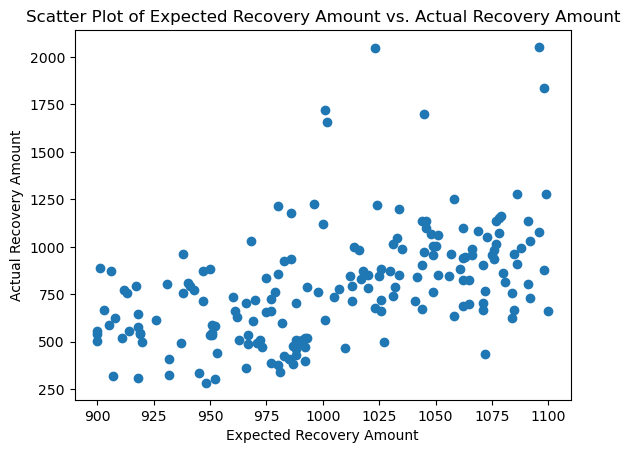

In [50]:
# Filter the data for expected recovery amounts between $900 and $1100
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Create a scatter plot
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['actual_recovery_amount'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.show()

In [51]:
# Define the threshold levels
thresholds = [1000, 2000]

# Create a new column to represent the recovery strategy level
data['recovery_level'] = pd.cut(data['expected_recovery_amount'], bins=thresholds, labels=False)

# Perform the Kruskal-Wallis test for the window [900, 1100]
window1_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]
group1 = window1_data[window1_data['recovery_level'] == 0]['actual_recovery_amount']
group2 = window1_data[window1_data['recovery_level'] == 1]['actual_recovery_amount']
statistic1, p_value1 = stats.kruskal(group1, group2)

# Perform the Kruskal-Wallis test for the window [950, 1050]
window2_data = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]
group3 = window2_data[window2_data['recovery_level'] == 0]['actual_recovery_amount']
group4 = window2_data[window2_data['recovery_level'] == 1]['actual_recovery_amount']
statistic2, p_value2 = stats.kruskal(group3, group4)

# Print the results
print("Results for window [900, 1100]:")
print("Kruskal-Wallis statistic:", statistic1)
print("p-value:", p_value1)
print()
print("Results for window [950, 1050]:")
print("Kruskal-Wallis statistic:", statistic2)
print("p-value:", p_value2)

Results for window [900, 1100]:
Kruskal-Wallis statistic: nan
p-value: nan

Results for window [950, 1050]:
Kruskal-Wallis statistic: nan
p-value: nan


In [52]:
import statsmodels.api as sm

# Define the input and output variables
X = data['expected_recovery_amount']
y = data['actual_recovery_amount']

# Add a constant term to the input variables
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression results
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                            16:19:27   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [57]:
# Define the threshold levels
thresholds = [1000, 2000]  # Add more threshold levels if needed

# Create a new column to represent the recovery strategy level
data['recovery_level'] = pd.cut(data['expected_recovery_amount'], bins=thresholds, labels=False)

# Calculate the total recovery amount and total costs for each recovery strategy level
grouped_data = data.groupby('recovery_level').agg({'actual_recovery_amount': 'sum'})
grouped_data.columns = ['total_recovery_amount']
grouped_data['total_customers'] = data['recovery_level'].value_counts()

# Add recovery_level column to grouped_data
grouped_data['recovery_level'] = grouped_data.index

# Calculate total costs
grouped_data['total_costs'] = grouped_data['total_customers'] * 50

# Drop recovery levels with less than 2 observations
grouped_data = grouped_data[grouped_data['total_customers'] >= 2]

# Check if we have enough data points for regression analysis
if len(grouped_data) < 3:
    print("Insufficient data points for regression analysis.")
else:
    # Perform regression discontinuity analysis
    X = sm.add_constant(grouped_data[['total_costs', 'recovery_level']])
    y = grouped_data['total_recovery_amount']

    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results
    print(results.summary())

Insufficient data points for regression analysis.


In [61]:
# Define the threshold levels
thresholds = [950, 1050]  # Adjusted window for expected recovery amount

# Filter the data within the specified window
filtered_data = data[(data['expected_recovery_amount'] >= thresholds[0]) & (data['expected_recovery_amount'] <= thresholds[1])]

# Create a new column to represent the recovery strategy level
filtered_data.loc[:, 'recovery_level'] = pd.cut(filtered_data['expected_recovery_amount'], bins=thresholds, labels=False)

# Calculate the total recovery amount and total costs for each recovery strategy level
grouped_data = filtered_data.groupby('recovery_level').agg({'actual_recovery_amount': 'sum', 'recovery_level': 'count'})
grouped_data.columns = ['total_recovery_amount', 'total_customers']
grouped_data['total_costs'] = grouped_data['total_customers'] * 50

# Perform regression discontinuity analysis
X = sm.add_constant(grouped_data['total_costs'])
y = grouped_data['total_recovery_amount']

# Check if there are enough observations for regression analysis
if len(X) > 1:
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results
    print(results.summary())
else:
    print("Insufficient data for regression analysis.")

Insufficient data for regression analysis.


C:\Users\ammar\AppData\Local\Temp\ipykernel_35016\630741530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'recovery_level'] = pd.cut(filtered_data['expected_recovery_amount'], bins=thresholds, labels=False)
